# Project - Drug Performance Evaluation
#### By Gerardo Mora Cuevas

### Exploratory Data Analysis (EDA)

### Dataset: drug_cleaned

First, let's import the dataset, which is a csv file:

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Drug_clean.csv")

The 5 first rows are shown below:

In [2]:
df.head()

,Condition,Drug,Indication,Type,Form,EaseOfUse,Effective,Price,Reviews,Satisfaction
0,Acute Bacterial Sinusitis,Amoxicillin,On Label,RX,Capsule,3.852353,3.655882,12.590000,86.294118,3.197647
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,Off Label,RX,Liquid (Drink),3.470000,3.290000,287.370000,43.000000,2.590000
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,Tablet,3.121429,2.962857,70.608571,267.285714,2.248571
3,Acute Bacterial Sinusitis,Ampicillin,On Label,RX,Capsule,2.000000,3.000000,12.590000,1.000000,1.000000
4,Acute Bacterial Sinusitis,Ampicillin,On Label,RX,Tablet,3.250000,3.000000,125.240000,15.000000,3.000000


Now, what are the dimensions of the dataframe? With the shape function I can find out:

In [3]:
df.shape

(685, 10)

The dataframe has 685 rows, and 10 columns.

Let's see the information of the dataframe, which includes the name of the columns, if there are null values and the data type:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     685 non-null    object 
 1   Drug          685 non-null    object 
 2   Indication    685 non-null    object 
 3   Type          685 non-null    object 
 4   Form          685 non-null    object 
 5   EaseOfUse     685 non-null    float64
 6   Effective     685 non-null    float64
 7   Price         685 non-null    float64
 8   Reviews       685 non-null    float64
 9   Satisfaction  685 non-null    float64
dtypes: float64(5), object(5)
memory usage: 53.6+ KB


From the information above, I can see there are no null values, and the data types are correct.

Now, with the describe() method I can obtain descriptive statistics from the dataframe:

In [5]:
df.describe(include="all")

,Condition,Drug,Indication,Type,Form,EaseOfUse,Effective,Price,Reviews,Satisfaction
count,685,685,685,685,685,685.000000,685.000000,685.000000,685.000000,685.000000
unique,37,470,3,4,6,NaN,NaN,NaN,NaN,NaN
top,hypertension,Niacin,On Label,RX,Tablet,NaN,NaN,NaN,NaN,NaN
freq,101,8,548,484,300,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.920038,3.523530,174.211183,82.644410,3.195699
std,NaN,NaN,NaN,NaN,NaN,0.894212,0.954126,667.743466,273.281398,1.030442
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,4.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,3.556667,3.000000,15.490000,3.000000,2.575000
50%,NaN,NaN,NaN,NaN,NaN,4.050000,3.600000,49.990000,10.350877,3.200000
75%,NaN,NaN,NaN,NaN,NaN,4.500000,4.110000,145.990000,57.000000,3.901250


The first insights are:

-There are 685 records in the dataset.

-There are 37 medical conditions treated by the drugs and 470 unique drugs.

-Hypertension is the most treated condition.

-Niacin is the most frequent drug.

-Tablet is the most frequent Form.

-The average price of all the drugs is $174.21

-The cheapest drug is $4.

-The expensive drug is $10362.19

### Exploratory Visualizations

Histograms of "EaseOfUse", "Effective" and "Satisfaction":

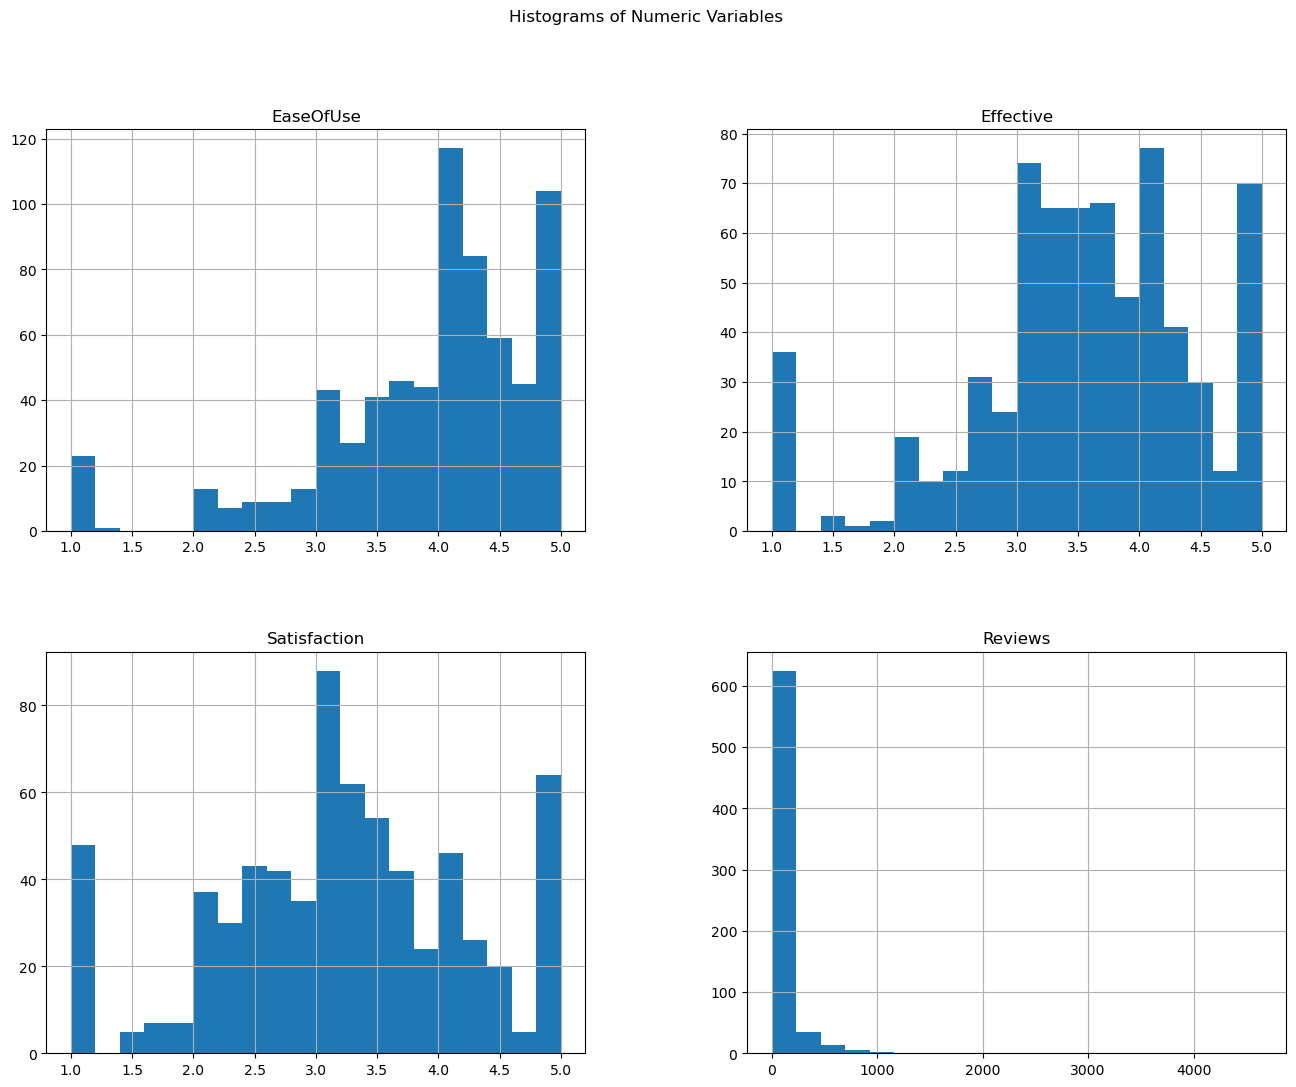

In [6]:
import matplotlib.pyplot as plt

df.hist(["EaseOfUse","Effective","Satisfaction","Reviews"], bins=20, figsize=(16,12))
plt.suptitle("Histograms of Numeric Variables")
plt.show()

Now, let' see the correlation between numeric variables:

In [7]:
import seaborn as sns

#Corr Matrix
corr_matrix = df[["EaseOfUse","Effective","Satisfaction","Reviews","Price"]].corr()


print(corr_matrix)

              EaseOfUse  Effective  Satisfaction   Reviews     Price
EaseOfUse      1.000000   0.659237      0.650156  0.011962 -0.107480
Effective      0.659237   1.000000      0.864863 -0.035802 -0.017532
Satisfaction   0.650156   0.864863      1.000000 -0.084216 -0.024800
Reviews        0.011962  -0.035802     -0.084216  1.000000 -0.024927
Price         -0.107480  -0.017532     -0.024800 -0.024927  1.000000


There is a good correlation between Effectiveness and Satisfaction, with a value of 0.86, and Effectiveness and Ease Of Use with a value of 0.659.

Below is a bar graph with the frequency of medical conditions:

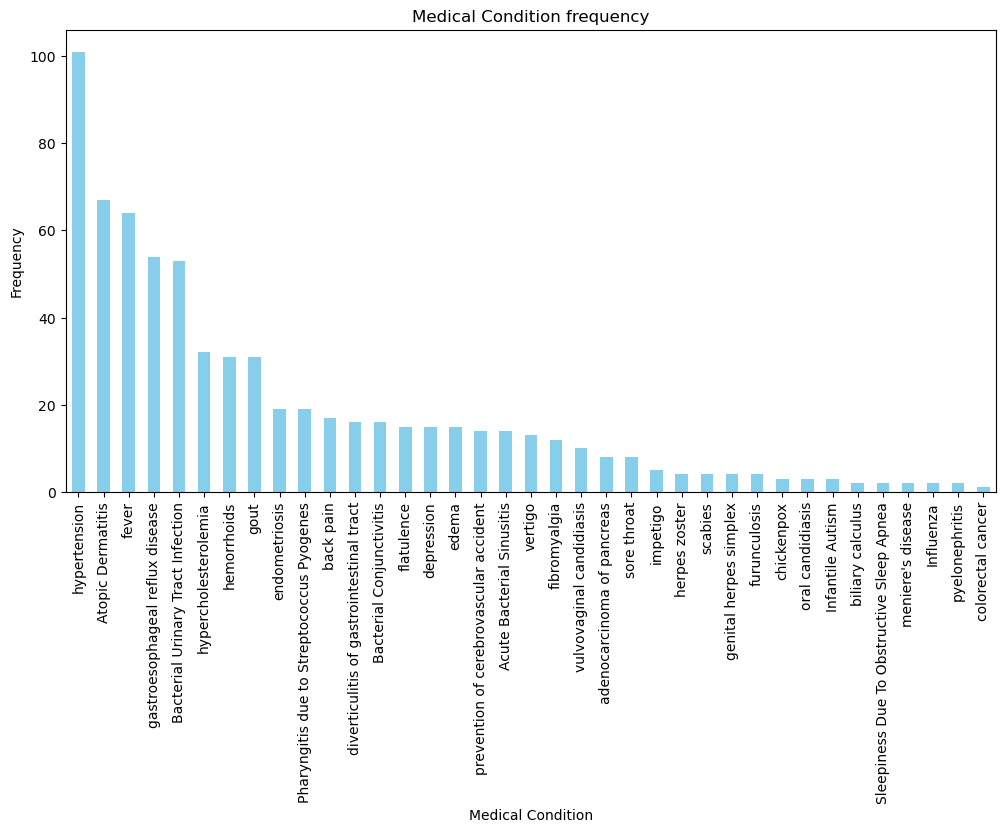

In [8]:
plt.figure(figsize=(12,6))
df["Condition"].value_counts().plot(kind="bar",color="skyblue")
plt.title("Medical Condition frequency")
plt.xlabel("Medical Condition")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

Hypertension is the most frequent medical condition. The less frequent is colorectal cancer.

And what about the drug form frequency?

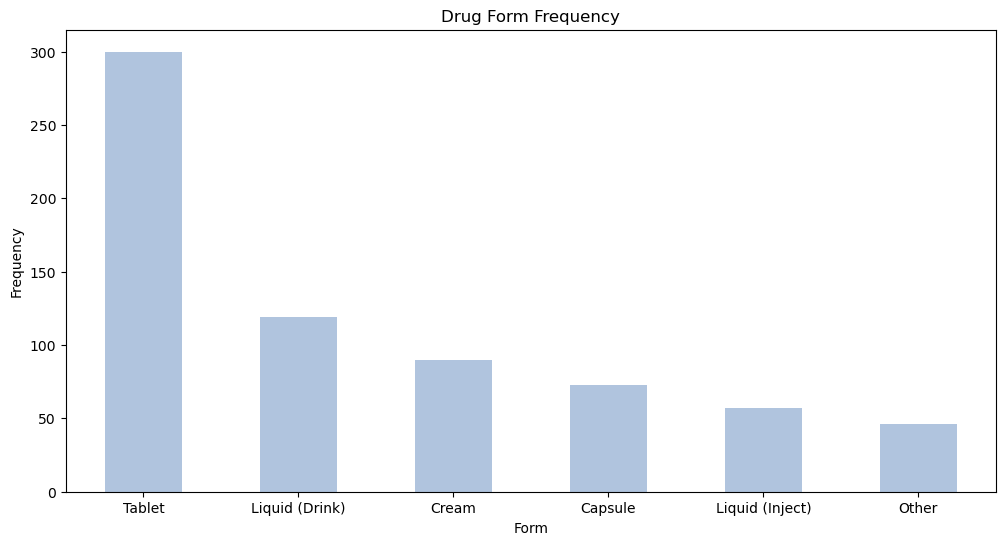

In [9]:
plt.figure(figsize=(12,6))
df["Form"].value_counts().plot(kind="bar",color="lightsteelblue")
plt.title("Drug Form Frequency")
plt.xlabel("Form")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

The most form is Tablet.

) missing from current font.\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


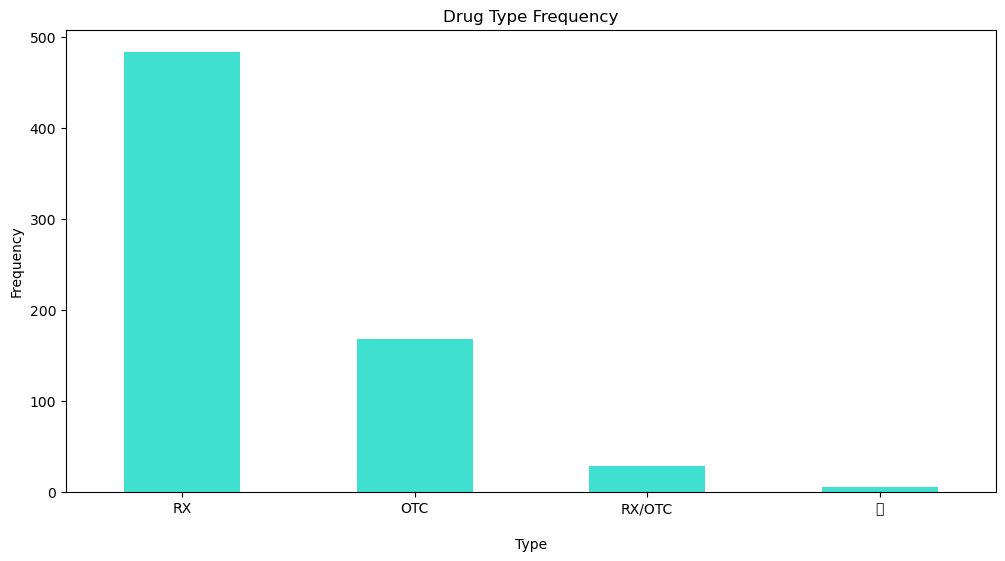

In [10]:
plt.figure(figsize=(12,6))
df["Type"].value_counts().plot(kind="bar",color="turquoise")
plt.title("Drug Type Frequency")
plt.xlabel("Type")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

Most drugs are Rx, which means there are prescribed drugs.

Let's see the relation between Price and Type of drug:

) missing from current font.\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


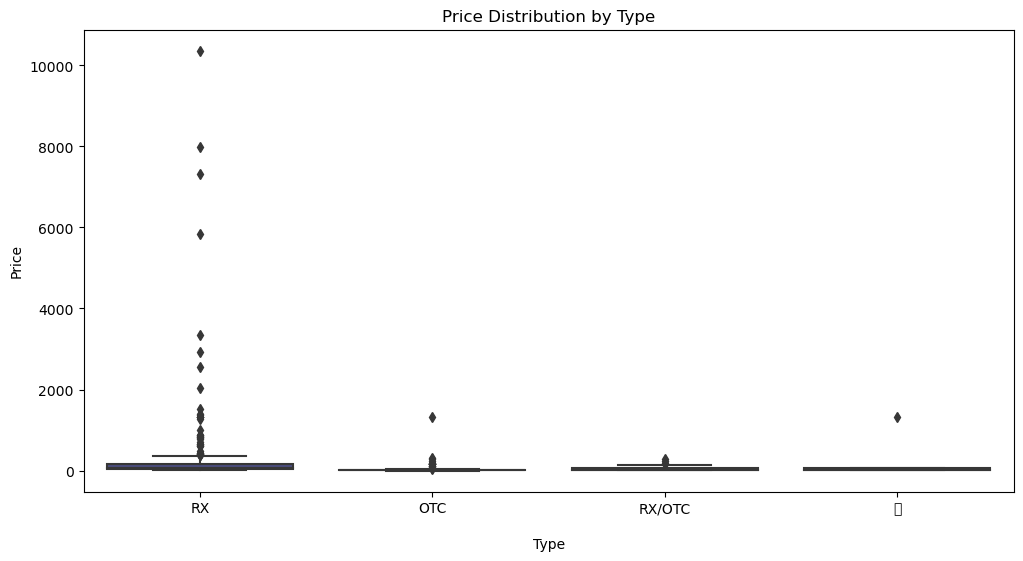

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Type",y="Price",data=df,palette="viridis")
plt.title("Price Distribution by Type")
plt.xlabel("Type")
plt.ylabel("Price")
plt.show()

Most prices are below $500, but I can see a lot of outliers in Rx.

LEt's plot a boxplot to see the effectiveness distribution based on drug type:

) missing from current font.\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


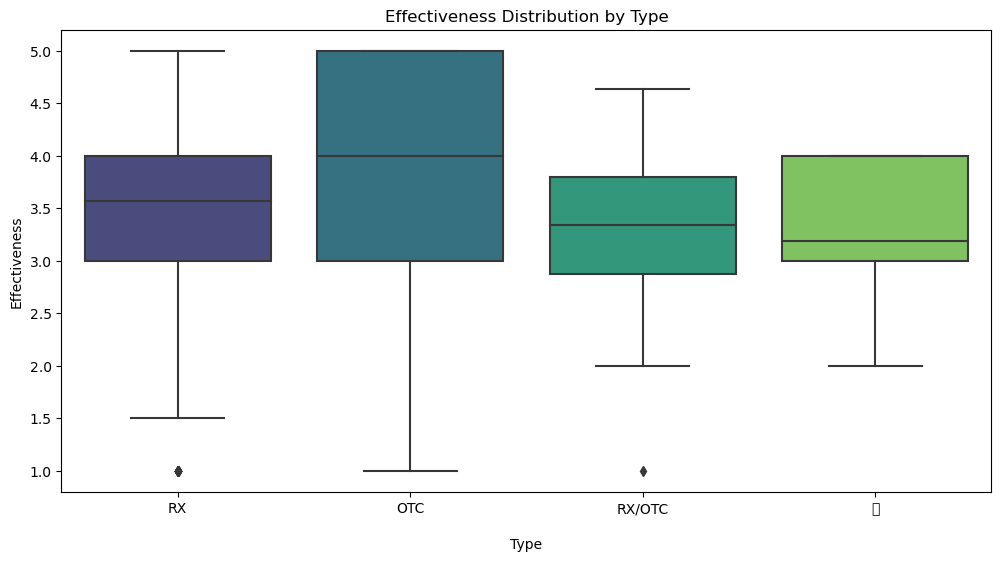

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Type",y="Effective",data=df,palette="viridis")
plt.title("Effectiveness Distribution by Type")
plt.xlabel("Type")
plt.ylabel("Effectiveness")
plt.show()

The most effective drug type is OTC.

And what about the relation between ease of use and effectiveness?

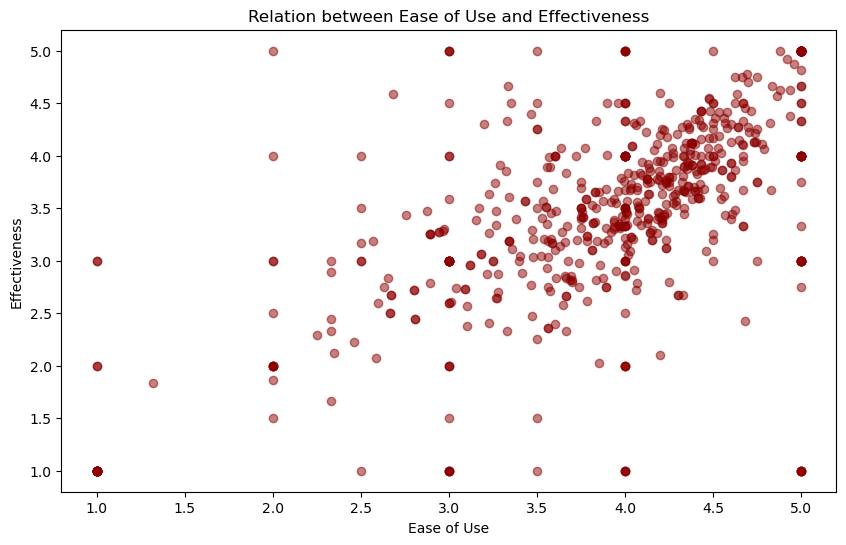

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(df["EaseOfUse"],df["Effective"],alpha=0.5,color='darkred')
plt.title("Relation between Ease of Use and Effectiveness")
plt.xlabel("Ease of Use")
plt.ylabel("Effectiveness")
plt.show()

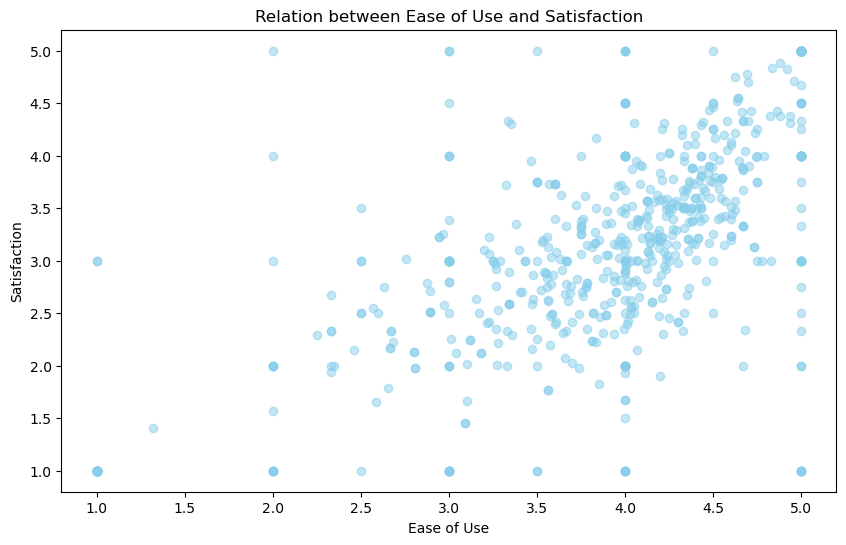

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(df["EaseOfUse"],df["Satisfaction"],alpha=0.5,color='skyblue')
plt.title("Relation between Ease of Use and Satisfaction")
plt.xlabel("Ease of Use")
plt.ylabel("Satisfaction")
plt.show()

Relation between Price and Satisfaction:

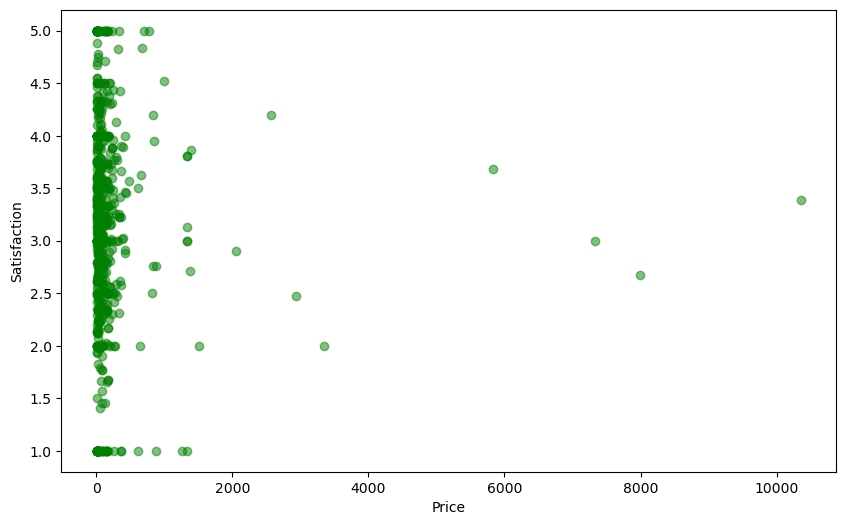

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(df["Price"], df["Satisfaction"], alpha=0.5, color="green")
plt.xlabel("Price")
plt.ylabel("Satisfaction")
plt.show()


) missing from current font.naconda\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from current font.\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


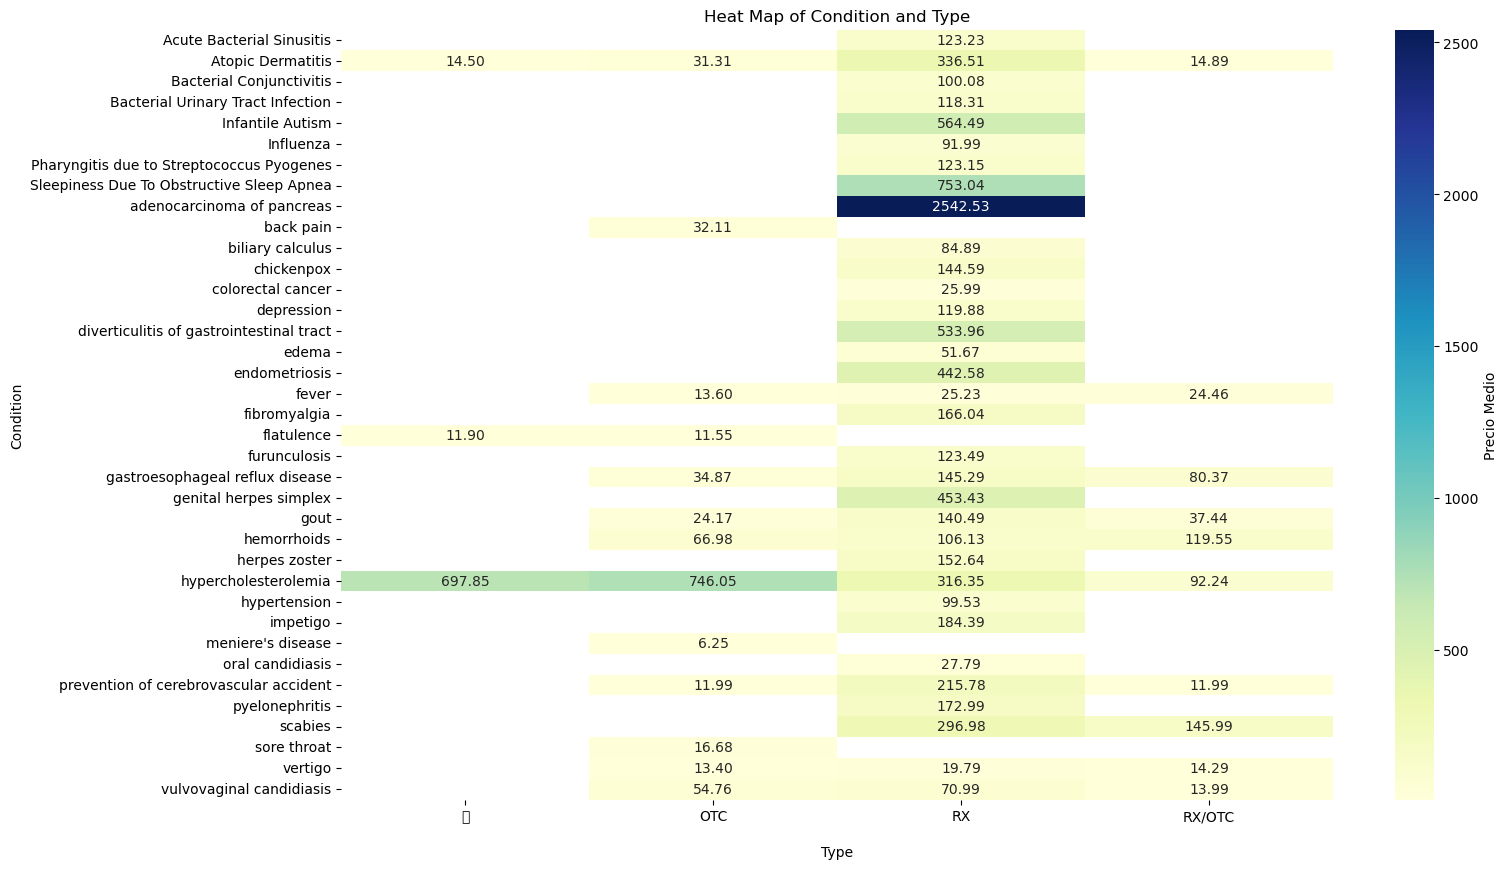

In [16]:
# Mapa de calor para visualizar el precio por condición y tipo
plt.figure(figsize=(16, 10))
pivot_table = pd.pivot_table(df, values='Price', index='Condition', columns='Type', aggfunc=np.mean)
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Precio Medio'})
plt.title('Heat Map of Condition and Type')
plt.xlabel('Type')
plt.ylabel('Condition')
plt.show()


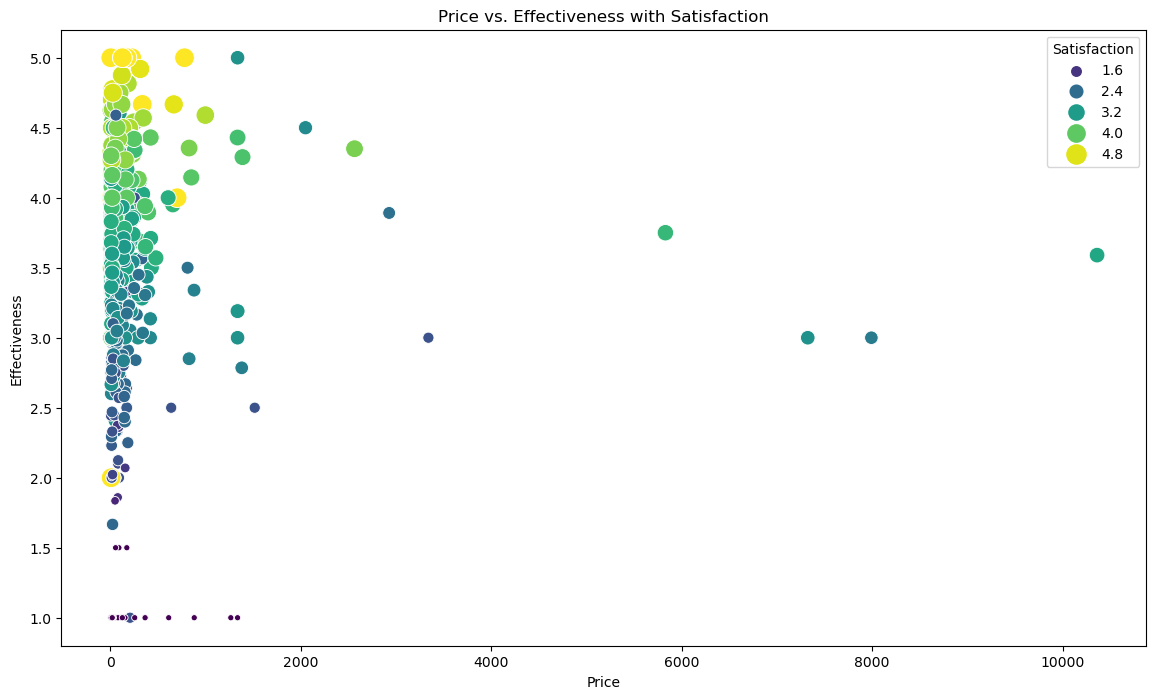

In [17]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Price', y='Effective', data=df, hue='Satisfaction', size='Satisfaction', sizes=(20, 200), palette='viridis')
plt.title('Price vs. Effectiveness with Satisfaction')
plt.xlabel('Price')
plt.ylabel('Effectiveness')
plt.legend(title='Satisfaction')
plt.show()


D:\Mora\Programas\Anaconda\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


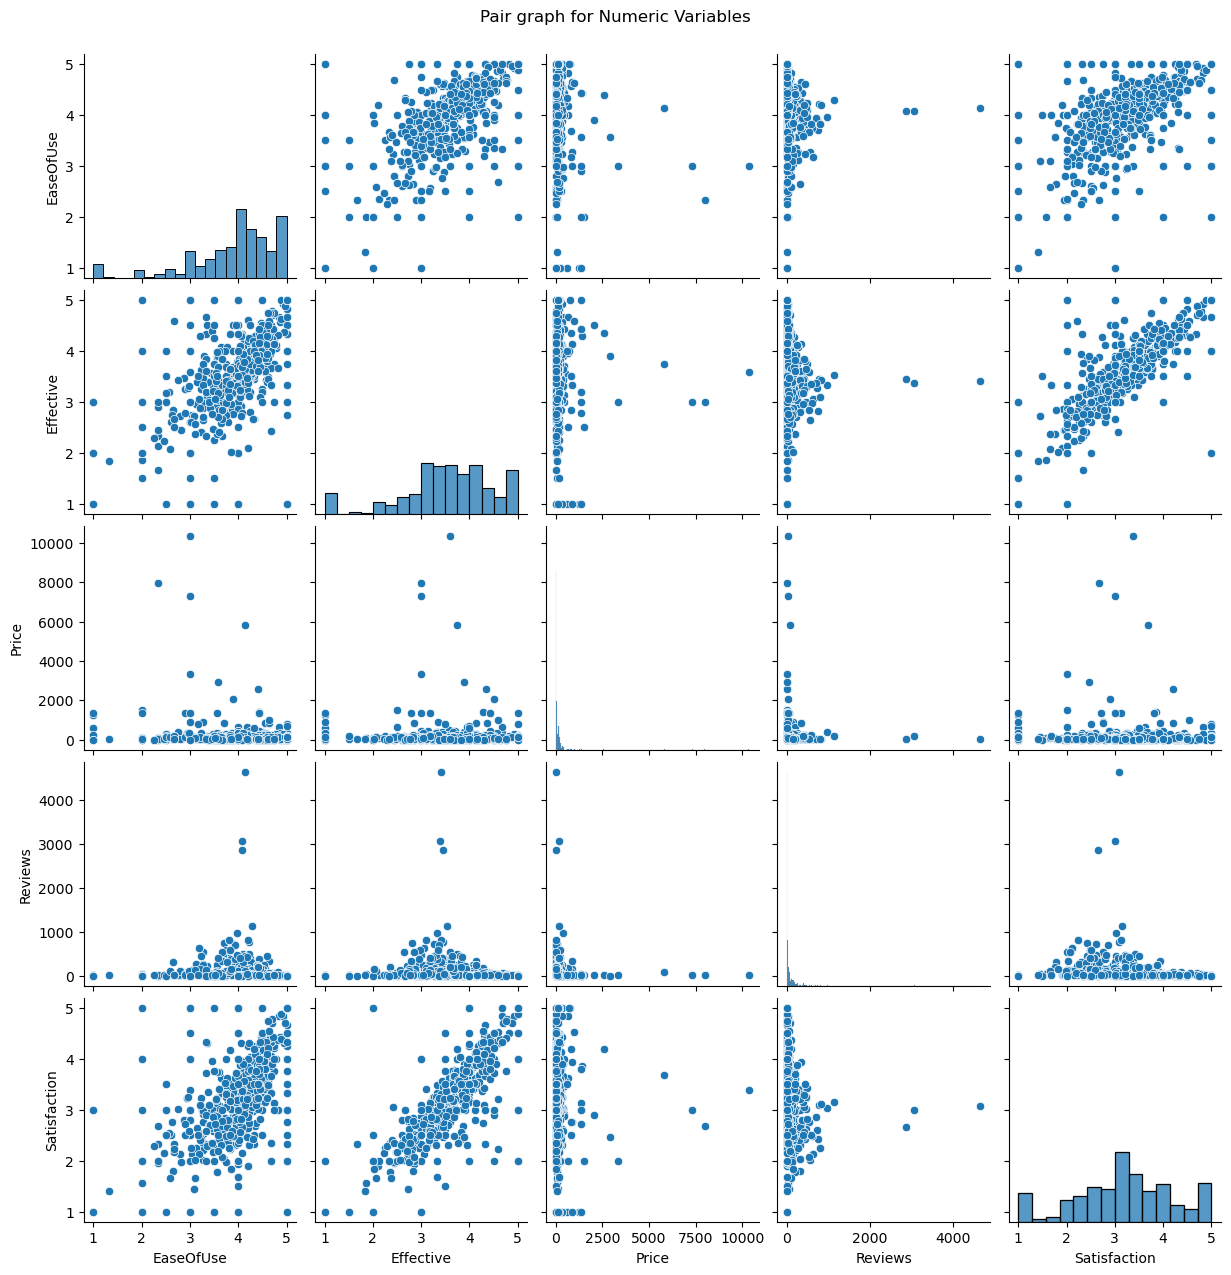

In [18]:
sns.pairplot(df[['EaseOfUse', 'Effective', 'Price', 'Reviews', 'Satisfaction']])
plt.suptitle('Pair graph for Numeric Variables', y=1.02)
plt.show()
